<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import sympy
from sympy import gamma
sympy.init_printing()

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
pi = sympy.pi
n = sympy.symbols('n')

# Pertubation Theory Solutions

## Define the Coefficient for our Power Series

Defines $c_n$

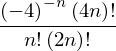

In [4]:
c_n = sympy.factorial(4*n)/(((-4)**n)*sympy.factorial(n)*sympy.factorial(2*n))
c_n

## Calculate First 100 elements in Power Series

In [5]:
c = []
for i in range(101):
    c.append(c_n.subs([(n, i)]).evalf())

## Plot the Approximate Pertubation Theory Solutions

The following code obtains the pertubation theory solutions.

In [6]:
def approx_solution(lam, c, m):
    Z = 0
    for i in range(m+1):
        Z+=c[i]*lam**i
    return Z

Obtain the arrays for $Z_0$ through to $Z_4$.

In [7]:
lam = np.linspace(0 ,0.1, 1000)

Z0 = approx_solution(lam, c, 0)
Z1 = approx_solution(lam, c, 1)
Z2 = approx_solution(lam, c, 2)
Z3 = approx_solution(lam, c, 3)
Z4 = approx_solution(lam, c, 4)

Z100 = approx_solution(lam, c, 100)

Z = [Z0, Z1, Z2, Z3, Z4]

Plot the approximate solutions  $Z_m(\lambda)$ for $m=0, 1, 2, 3, 4$

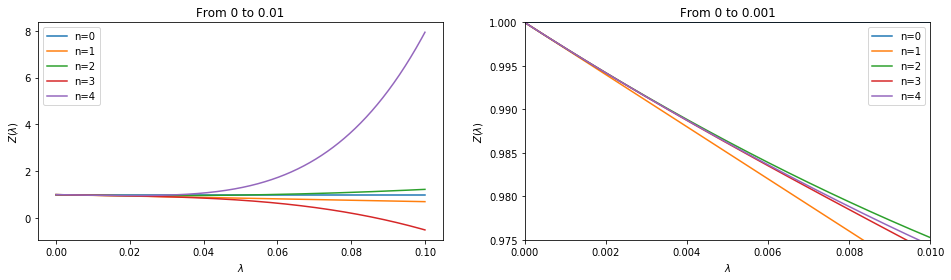

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

for i, Zi in enumerate(Z):
    ax[0].plot(lam, Zi, label='n={}'.format(i))
    ax[1].plot(lam, Zi, label='n={}'.format(i))


ax[1].set_xlim(0, 0.01)
ax[1].set_ylim(0.975,1)

ax[0].set_xlabel('$\lambda$')
ax[0].set_ylabel('$Z(\lambda)$')
ax[1].set_xlabel('$\lambda$')
ax[1].set_ylabel('$Z(\lambda)$')

ax[0].set_title('From 0 to 0.01')
ax[1].set_title('From 0 to 0.001')

ax[0].legend()
ax[1].legend()

plt.show()

So what gives? It appears that going higher order in our solutions makes our solutions deviate more and more from eachother! The important aspect to keep in mind is these solutions are intended to be used as approximations <b> for small $\lambda$ </b>. It is perhaps more clear in the right plot that the solutions <i> "converge to eachother" for small lambda </i>. 

# Actual Solution

In the code below, we determine the actual solution to the integral and compare it to our solutions obtained through pertubation theory. We show that for small $\lambda$, the higher order solutions provide a better and better approximation.

## Define the Integrand and the Integral for the Actual Solution

In [9]:
def integrand(x, lam):
    return np.exp(-0.5*x**2-lam*x**4)

def Z_actual(lam):
    return (1/(np.sqrt(2*np.pi)))*integrate.quad(integrand, -np.inf, np.inf, args=(lam))[0]

## Obtain the actual Solution

In [10]:
Z = np.array([])
for l in lam:
    Z = np.append(Z, Z_actual(l))

## Compare the Actual Solution to Different Orders of Pertubation

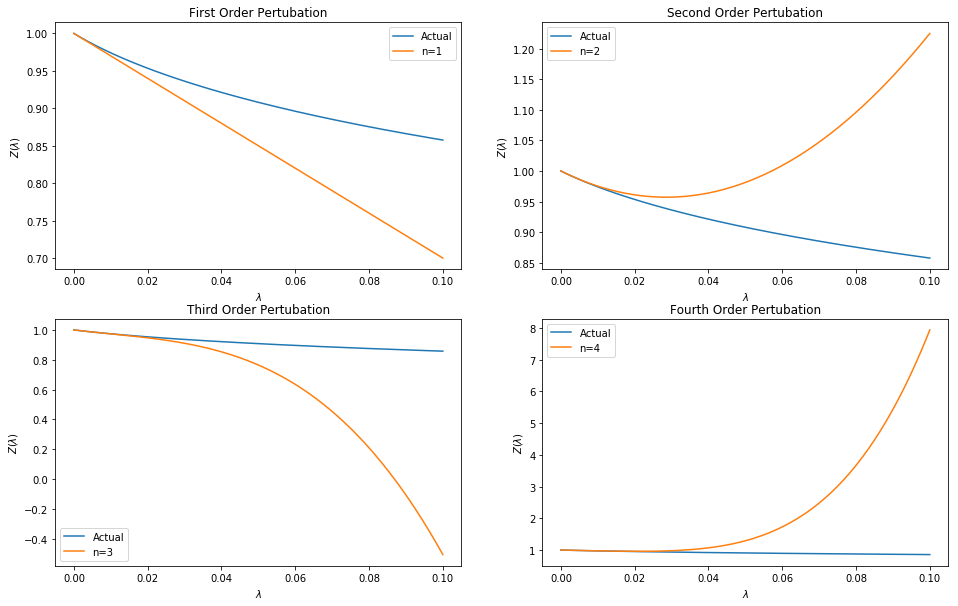

In [11]:
fig, axes = plt.subplots(2,2, figsize=(16,10))

axes[0][0].plot(lam, Z, label='Actual')
axes[0][0].plot(lam, Z1, label='n=1')

axes[0][1].plot(lam, Z, label='Actual')
axes[0][1].plot(lam, Z2, label='n=2')

axes[1][0].plot(lam, Z, label='Actual')
axes[1][0].plot(lam, Z3, label='n=3')

axes[1][1].plot(lam, Z, label='Actual')
axes[1][1].plot(lam, Z4, label='n=4')

for ax in axes.reshape(-1): 
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('$Z(\lambda)$')
    ax.legend()
    
axes[0][0].set_title('First Order Pertubation')
axes[0][1].set_title('Second Order Pertubation')
axes[1][0].set_title('Third Order Pertubation')
axes[1][1].set_title('Fourth Order Pertubation')

plt.show()

Clearly the pertubation solutions tend to "zoom off" once they reach a certain point. By decreasing the x limit on our plots, we can show that the higher order solutions appear to agree with the true solution for larger values of $\lambda$

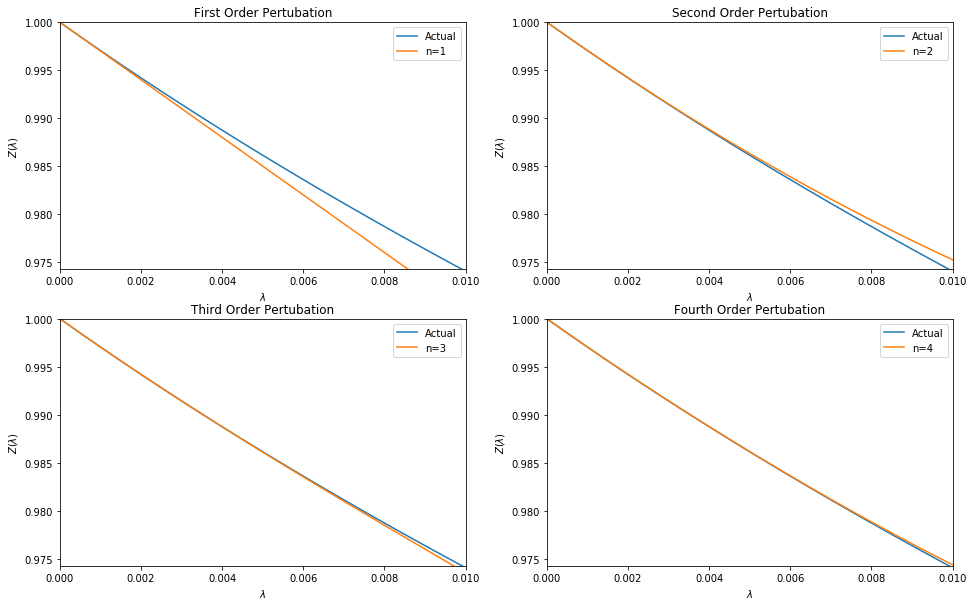

In [12]:
fig, axes = plt.subplots(2,2, figsize=(16,10))

axes[0][0].plot(lam, Z, label='Actual')
axes[0][0].plot(lam, Z1, label='n=1')

axes[0][1].plot(lam, Z, label='Actual')
axes[0][1].plot(lam, Z2, label='n=2')

axes[1][0].plot(lam, Z, label='Actual')
axes[1][0].plot(lam, Z3, label='n=3')

axes[1][1].plot(lam, Z, label='Actual')
axes[1][1].plot(lam, Z4, label='n=4')

for ax in axes.reshape(-1): 
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('$Z(\lambda)$')
    ax.set_xlim(0,0.01)
    ax.set_ylim(np.min(Z[0:100]), np.max(Z[0:100]))
    ax.legend()
    
axes[0][0].set_title('First Order Pertubation')
axes[0][1].set_title('Second Order Pertubation')
axes[1][0].set_title('Third Order Pertubation')
axes[1][1].set_title('Fourth Order Pertubation')

plt.show()

## The Fly in the Ointment

However, if we use large enough $n$ (we use $n=100$ below) then the approximate solution series diverges very early and the two solutions do not agree for a large range of $\lambda$. The approximate and actual solutions certainly agree better for <i> small </i> $\lambda$, but the series diverges sooner.  

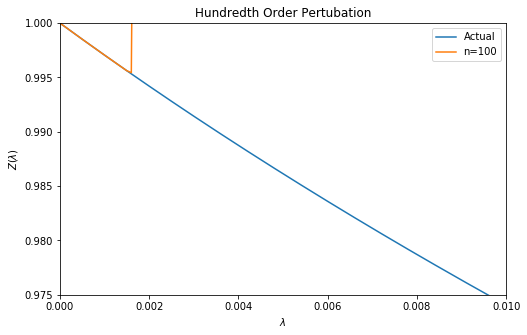

In [13]:
fig, axes = plt.subplots(1,1, figsize=(8,5))

axes.plot(lam, Z, label='Actual')
axes.plot(lam, Z100, label='n=100')

axes.set_xlim(0, 0.01)
axes.set_ylim(0.975,1)
axes.set_xlabel('$\lambda$')
axes.set_ylabel('$Z(\lambda)$')
axes.set_title('Hundredth Order Pertubation')
axes.legend()

plt.show()

It seems that there exists "a sort of sweet spot" for the number of terms one needs to use for appropriate approximation, and this depends on the values of $\lambda$ they wish to consider.